In [ ]:
#    ____       _       _
#   |  _ \  ___| |_ __ | |__   __ _  ___
#   | | | |/ _ \ | '_ \| '_ \ / _` |/ _ \
#   | |_| |  __/ | |_) | | | | (_| |  __/
#   |____/ \___|_| .__/|_| |_|\__,_|\___|
#                |_|

In [21]:
%pylab inline
from scipy.integrate import odeint
from scipy.special import airy
from scipy.optimize import fsolve

Populating the interactive namespace from numpy and matplotlib


Handbook for Exact Solutions for Ordinary Diff. Eq. , Second Edition<br>
Polyanin, Zaitsev<br>
par. 2.1.2, item 2, page 213<br>

https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.airy.html

https://www.wolframalpha.com/input/?i=y(x)%27%27-(8x%2B2)y(x)%3D0

solve
$
y''-(ax+b)\cdot y=0
$

<br>
substitute
$
u = a^\frac{-2}{3}\cdot (ax+b)
$

<br>
then solve
$
y''-uy=0
$

gives:
$
y = c_1Ai(u)+c_2Bi(u)
$
<br>
with Ai and Bi are Airy functions

$
y' = c_1Aip(u)\cdot u' + c_2Bip(u)\cdot u'
$
<br>
with Aip and Bip are derivative of the Airy functions


In [8]:
a = 8.0
b = 2.0

# substitution
def u(x):
    return a**(-2/3.0)*(a*x+b)

ai, aip, bi, bip = airy(u(0))
#print ai, aip, bi, bip

solve for $c_1$ and $c_2$
<br>
$
y_0 = y(0) = c_1Ai(u_0)+c_2Bi(u_0)
$
<br>
$
y_1 = y'(0) =c_1Aip(u_0)\cdot u'(u_0) + c_2Bip(u_0)\cdot u'(u_0)
$
<br><br>
$
u'(u_0) = \frac{d}{dx}a^\frac{-2}{3}\cdot (ax+b) = a^\frac{-2}{3}\cdot a = a^\frac{1}{3}
$

In [19]:
y0 = 0
y1 = 1
def const((c1,c2)):
    f1 = c1*ai  + c2*bi  - y0
    f2 = c1*aip*a**(1/3.0) + c2*bip*a**(1/3.0) - y1
    return f1, f2

c1, c2 = fsolve(const, [1,1])
print c1, c2
#const((c1,c2))

-1.3418952413716418 0.3639434660019553


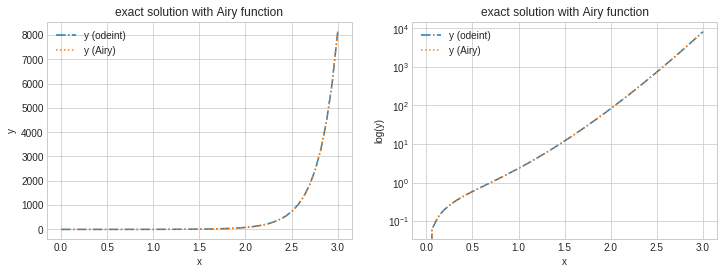

In [20]:
def model((y0,y1), x):
    y2 = (a*x+b)*y0
    return y1, y2

x = np.linspace(0, 3, 50)
ys = odeint(model, [y0,y1] ,x)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,4))
ax2.set_yscale('log')
ax1.plot(x, ys[:,0], '-.', label='y (odeint)')
ax2.plot(x, ys[:,0], '-.', label='y (odeint)')


Ai, Aip, Bi, Bip = airy(u(x))
Y = c1*Ai + c2*Bi
ax1.plot(x, Y, ':', label='y (Airy)')
ax2.plot(x, Y, ':', label='y (Airy)')

ax1.set_ylabel('y')
ax2.set_ylabel('log(y)')


for ax in [ax1,ax2]:
    ax.set_xlabel('x')
    ax.set_title('exact solution with Airy function')
    ax.grid(True);
    ax.legend();